## Building an entire model from a problem statement.


```
Dataset used is IRIS Dataset
Link: https://www.kaggle.com/saurabh00007/iriscsv
```



### Importing the libraries

Below is a list of the Python SciPy libraries required for this tutorial:

*   numpy
*   scipy
*   matplotlib
*   sklearn
*   pandas



In [23]:
import sys
import scipy
import numpy
import matplotlib
import pandas as pd
import sklearn

### Load The Data

I'm going to use the iris flower dataset.
The dataset contains 150 observations of iris flowers. There are four columns of measurements of the flowers in centimeters and the fifth column is the species of the flower observed.
All observed flowers belong to one of three species.

#### Importing the libraries needed

In [24]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Loading the dataset

In [25]:
dataset = pd.read_csv('IRIS.csv')
print(dataset)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


#### Dimensions of data

In [26]:
print(dataset.shape)

(150, 5)


#### Print the first five columns of the dataset

In [27]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Statistical summary

In [28]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Correlation of dataset

In [29]:
dataset.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


#### Detail about every column

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Checking the group by and the size

In [31]:
dataset.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Data Visualisation

> It is the graphical representation of information and data.




#### Univariate Plots: To understand each attribute

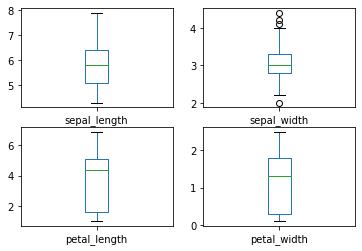

In [32]:
#box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

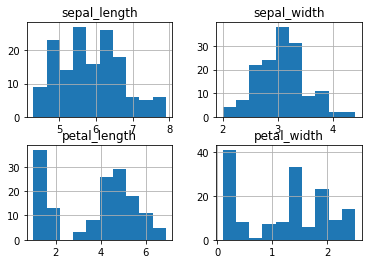

In [33]:
# histograms
dataset.hist()
pyplot.show()

#### Multivariate Plots: To understand the relationship between the attributes

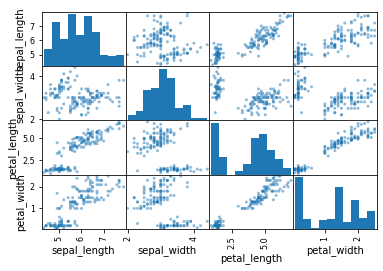

In [34]:
scatter_matrix(dataset)
pyplot.show()

### Algorithms

#### Creating a validation dataset


> Will split the loaded dataset into two, 80% of which we will use to train, evaluate and select among our models, and 20% that we will hold back as a validation dataset.



#### Splitting the dataset into the Training set and Test set

In [35]:
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

#### Creation of validation dataset

In [36]:
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

### Building Models


> Testing 6 different algorithms:
*   Logistic Regression (LR)
*   Linear Discriminant Analysis (LDA)
*   K-Nearest Neighbors (KNN).
*   Classification and Regression Trees (CART).
*   Gaussian Naive Bayes (NB).
*   Support Vector Machines (SVM).

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms.

#### Building the models here one by one

In [37]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.933333 (0.050000)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


#### Visualising and comparing all the algorithms

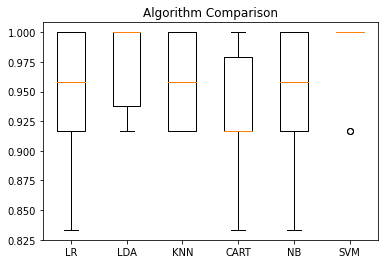

In [38]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

### Making Predictions

The results in the previous section suggest that the SVM was perhaps the most accurate model.

So let's move on with this as the final model.

Now let's move on with the accuracy of the model with the validation set.

In [39]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

#### Evaluating the predictions

##### Determining the accuracy

In [40]:
print(accuracy_score(Y_validation, predictions))

0.9666666666666667


##### Building the confusion matrix

In [41]:
print(confusion_matrix(Y_validation, predictions))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [42]:
print(classification_report(Y_validation, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



> So, this is how we got an accuracy of 96.67% on the hold out dataset.

